#  **601 Final Project on System of Award Management Archived Opporunities**
    By: Lahari Bandaru, Mohana Hemanth Kundurthi, Hemanth Akkenapally
---

*   Data original location: https://sam.gov/data-services/Contract%20Opportunities/Archived%20Data?privacy=Public

*   We have used the archived data from the year 2020 to 2022.


---


 Hypothesis: 
 1. Based on the year from 2020 to 2022, contracts which are properly documented and archived are decreased due to covid effects.
 2. Department of defence and agricultural contracts are more compared to other departments because of the rapid development of the technology.





In [ ]:
# In order to connect the drive and access the files
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import time
import seaborn as sns

In [ ]:
# reading the data into pandas dataframe

start_time = time.time()
chunk_size = 100000  # Adjust the chunk size

df2020 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/91lmieun5u1e8p87wmlnuglyzl3xm91h.csv', encoding='latin1', on_bad_lines='skip', low_memory=True, chunksize=chunk_size)])

df2021 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/7emabgf9ck2afprmrl459jnk30ewmabj.csv', encoding='latin1', on_bad_lines='skip', low_memory=True, chunksize=chunk_size)])

df2022 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/tdkmuj86qm2uxhvjlfkav2i3pnx9fkoa.csv', encoding='latin1', on_bad_lines='skip', low_memory=True, chunksize=chunk_size)])

<ipython-input-109-3c664f9aaccb>:6: DtypeWarning: Columns (17,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df2020 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/91lmieun5u1e8p87wmlnuglyzl3xm91h.csv', encoding='latin1', on_bad_lines='skip', low_memory=True, chunksize=chunk_size)])
<ipython-input-109-3c664f9aaccb>:6: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df2020 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/91lmieun5u1e8p87wmlnuglyzl3xm91h.csv', encoding='latin1', on_bad_lines='skip', low_memory=True, chunksize=chunk_size)])
<ipython-input-109-3c664f9aaccb>:6: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df2020 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/91lmieun5u1e8p87wmlnuglyzl3xm91h.csv', encoding='latin1', on_bad_lines='skip', 

Every Dataset has same set of columns and same type of information, which can reduce the code length and decreases the execution time.
But in order to get the exact length of null values and the data types info() has to be done individually.

### 1. Data Cleaning

In [ ]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371315 entries, 0 to 371314
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   NoticeId                  371315 non-null  object 
 1   Title                     371314 non-null  object 
 2   Sol#                      367836 non-null  object 
 3   Department/Ind.Agency     356959 non-null  object 
 4   CGAC                      356959 non-null  float64
 5   Sub-Tier                  356662 non-null  object 
 6   FPDS Code                 356854 non-null  object 
 7   Office                    356951 non-null  object 
 8   AAC Code                  355070 non-null  object 
 9   PostedDate                371315 non-null  object 
 10  Type                      371315 non-null  object 
 11  BaseType                  371315 non-null  object 
 12  ArchiveType               371315 non-null  object 
 13  ArchiveDate               369589 non-null  o

In [ ]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350988 entries, 0 to 350987
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   NoticeId                  350988 non-null  object 
 1   Title                     350986 non-null  object 
 2   Sol#                      348233 non-null  object 
 3   Department/Ind.Agency     350964 non-null  object 
 4   CGAC                      350964 non-null  float64
 5   Sub-Tier                  350590 non-null  object 
 6   FPDS Code                 350964 non-null  object 
 7   Office                    350947 non-null  object 
 8   AAC Code                  348522 non-null  object 
 9   PostedDate                350988 non-null  object 
 10  Type                      350988 non-null  object 
 11  BaseType                  350987 non-null  object 
 12  ArchiveType               350988 non-null  object 
 13  ArchiveDate               350988 non-null  o

In [ ]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341592 entries, 0 to 341591
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   NoticeId                  341592 non-null  object 
 1   Title                     341592 non-null  object 
 2   Sol#                      338625 non-null  object 
 3   Department/Ind.Agency     341583 non-null  object 
 4   CGAC                      341583 non-null  float64
 5   Sub-Tier                  341169 non-null  object 
 6   FPDS Code                 341583 non-null  object 
 7   Office                    341566 non-null  object 
 8   AAC Code                  338685 non-null  object 
 9   PostedDate                341592 non-null  object 
 10  Type                      341592 non-null  object 
 11  BaseType                  341592 non-null  object 
 12  ArchiveType               341592 non-null  object 
 13  ArchiveDate               304479 non-null  o

In [ ]:
df2020.isnull().sum()

NoticeId                         0
Title                            1
Sol#                          3479
Department/Ind.Agency        14356
CGAC                         14356
Sub-Tier                     14653
FPDS Code                    14461
Office                       14364
AAC Code                     16245
PostedDate                       0
Type                             0
BaseType                         0
ArchiveType                      0
ArchiveDate                   1726
SetASideCode                237227
SetASide                    237227
ResponseDeadLine             86116
NaicsCode                    19684
ClassificationCode           10754
PopStreetAddress            336528
PopCity                     255221
PopState                    250015
PopZip                      249299
PopCountry                  209006
Active                           0
AwardNumber                 294617
AwardDate                   295142
Award$                      302198
Awardee             

In [ ]:
df2021.isnull().sum()

NoticeId                         0
Title                            2
Sol#                          2755
Department/Ind.Agency           24
CGAC                            24
Sub-Tier                       398
FPDS Code                       24
Office                          41
AAC Code                      2466
PostedDate                       0
Type                             0
BaseType                         1
ArchiveType                      0
ArchiveDate                      0
SetASideCode                221324
SetASide                    221324
ResponseDeadLine             81098
NaicsCode                    17524
ClassificationCode           12098
PopStreetAddress            326591
PopCity                     221644
PopState                    220947
PopZip                      227378
PopCountry                  192594
Active                           0
AwardNumber                 277036
AwardDate                   277464
Award$                      282885
Awardee             

In [ ]:
df2022.isnull().sum()

NoticeId                         0
Title                            0
Sol#                          2967
Department/Ind.Agency            9
CGAC                             9
Sub-Tier                       423
FPDS Code                        9
Office                          26
AAC Code                      2907
PostedDate                       0
Type                             0
BaseType                         0
ArchiveType                      0
ArchiveDate                  37113
SetASideCode                213519
SetASide                    213519
ResponseDeadLine             75503
NaicsCode                    19407
ClassificationCode           11020
PopStreetAddress            317893
PopCity                     206219
PopState                    209569
PopZip                      217012
PopCountry                  185992
Active                           0
AwardNumber                 272171
AwardDate                   272225
Award$                      277390
Awardee             

Each DataFrame has a huge number of null values but for the hypothesis we propose we need only certain set of columns, remaining can be dropped.

In [ ]:
# droping columns which has more than 10% of null values except 'AwardDate','Award$','Awardee','ArchiveDate' these columns

def null_droper(df):
  a=(df.isnull().sum())*(100/len(df))
  col_drop=[]
  for i in a.index:
    if(a[i]>=10):
      #print(i)
      col_drop.append(i)
  #print(len(col_drop))
  except_col=['AwardDate','Award$','Awardee','ArchiveDate']
  col_drop=[col for col in col_drop if col not in except_col]
  df1=df.drop(col_drop,axis=1)
  return df1

In [ ]:
df2020V1=null_droper(df2020)
df2021V1=null_droper(df2021)
df2022V1=null_droper(df2022)

In [ ]:
df2020V1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371315 entries, 0 to 371314
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NoticeId                371315 non-null  object 
 1   Title                   371314 non-null  object 
 2   Sol#                    367836 non-null  object 
 3   Department/Ind.Agency   356959 non-null  object 
 4   CGAC                    356959 non-null  float64
 5   Sub-Tier                356662 non-null  object 
 6   FPDS Code               356854 non-null  object 
 7   Office                  356951 non-null  object 
 8   AAC Code                355070 non-null  object 
 9   PostedDate              371315 non-null  object 
 10  Type                    371315 non-null  object 
 11  BaseType                371315 non-null  object 
 12  ArchiveType             371315 non-null  object 
 13  ArchiveDate             369589 non-null  object 
 14  NaicsCode           

In [ ]:
print("Checking whether the df2020V1 columns and df2021V1 columns same or not:",list(df2020V1.columns)==list(df2021V1.columns))
print("Checking whether the df2020V1 columns and df2022V1 columns same or not:",list(df2020V1.columns)==list(df2022V1.columns))

Checking whether the df2020V1 columns and df2021V1 columns same or not: True
Checking whether the df2020V1 columns and df2022V1 columns same or not: True


In [ ]:
df = pd.concat([df2020V1, df2021V1,df2022V1])
df=df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063895 entries, 0 to 1063894
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NoticeId                1063895 non-null  object 
 1   Title                   1063892 non-null  object 
 2   Sol#                    1054694 non-null  object 
 3   Department/Ind.Agency   1049506 non-null  object 
 4   CGAC                    1049506 non-null  float64
 5   Sub-Tier                1048421 non-null  object 
 6   FPDS Code               1049401 non-null  object 
 7   Office                  1049464 non-null  object 
 8   AAC Code                1042277 non-null  object 
 9   PostedDate              1063895 non-null  object 
 10  Type                    1063895 non-null  object 
 11  BaseType                1063894 non-null  object 
 12  ArchiveType             1063895 non-null  object 
 13  ArchiveDate             1025056 non-null  object 
 14  Na

In [ ]:
dfV1 = df.dropna(subset=['Award$'])

In [ ]:
dfV1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201422 entries, 0 to 1063894
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NoticeId                201422 non-null  object 
 1   Title                   201421 non-null  object 
 2   Sol#                    200777 non-null  object 
 3   Department/Ind.Agency   196657 non-null  object 
 4   CGAC                    196657 non-null  float64
 5   Sub-Tier                196657 non-null  object 
 6   FPDS Code               196654 non-null  object 
 7   Office                  196657 non-null  object 
 8   AAC Code                196657 non-null  object 
 9   PostedDate              201422 non-null  object 
 10  Type                    201422 non-null  object 
 11  BaseType                201422 non-null  object 
 12  ArchiveType             201422 non-null  object 
 13  ArchiveDate             201352 non-null  object 
 14  NaicsCode          

In [ ]:
def convert_column_to_float(column):
    new_column = []
    for value in column:
        try:
            new_value = float(value)
            new_column.append(new_value)
        except ValueError:
            # If the value couldn't be converted to a float, try to extract a number from the text.
            matches = re.findall(r'\d+', value)
            if len(matches) == 1:
                new_value = float(matches[0])
                new_column.append(new_value)
            else:
                # If there were no numbers in the text or more than one number was found, remove the row.
                new_column.append(np.nan)
                continue
    return new_column

In [ ]:
dfV1['Award$']=convert_column_to_float(dfV1['Award$'])

<ipython-input-125-5588b833215a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfV1['Award$']=convert_column_to_float(dfV1['Award$'])


In [ ]:
dfV1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201422 entries, 0 to 1063894
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NoticeId                201422 non-null  object 
 1   Title                   201421 non-null  object 
 2   Sol#                    200777 non-null  object 
 3   Department/Ind.Agency   196657 non-null  object 
 4   CGAC                    196657 non-null  float64
 5   Sub-Tier                196657 non-null  object 
 6   FPDS Code               196654 non-null  object 
 7   Office                  196657 non-null  object 
 8   AAC Code                196657 non-null  object 
 9   PostedDate              201422 non-null  object 
 10  Type                    201422 non-null  object 
 11  BaseType                201422 non-null  object 
 12  ArchiveType             201422 non-null  object 
 13  ArchiveDate             201352 non-null  object 
 14  NaicsCode          

In [ ]:
dfV1['Awardee']=dfV1['Awardee'].replace('null', 'Unknown_contractor')
dfV1['Awardee']=dfV1['Awardee'].replace('null ', 'Unknown_contractor')

<ipython-input-127-5862523019b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfV1['Awardee']=dfV1['Awardee'].replace('null', 'Unknown_contractor')
<ipython-input-127-5862523019b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfV1['Awardee']=dfV1['Awardee'].replace('null ', 'Unknown_contractor')




Dropping the unnecessary columns from the concatinated dataset





In [ ]:
#Dropping the unnecessary columns from the concatinated dataset
dfV2 = dfV1.drop(['Sol#','CGAC','FPDS Code','AAC Code','Type','BaseType','NaicsCode','ClassificationCode','PrimaryContactEmail','Link'], axis=1)

In [ ]:
dfV2.head()

,NoticeId,Title,Department/Ind.Agency,Sub-Tier,Office,PostedDate,ArchiveType,ArchiveDate,Active,AwardDate,Award$,Awardee,PrimaryContactFullname,OrganizationType,State,City,ZipCode,CountryCode
0,425a9edc53e84373aeb2826644ac97b6,66--Airfield Friction Tester,DEPT OF DEFENSE,DEPT OF THE ARMY,W7N4 USPFO ACTIVITY VT ARNG,2020-09-30 23:57:23.594-04,autocustom,2021-03-24,No,2020-09-30,75706.10,"HALLIDAY TECHNOLOGIES INC [DUNS: 011448375],10...","Name: Marketplace Support, Title: Marketplace ...",OFFICE,VT,COLCHESTER,05446-3099,USA
1,cbdb7b8ee8de4179b25c36e3b4819a2c,65--COVID 19 cleaning supplies,"STATE, DEPARTMENT OF","STATE, DEPARTMENT OF",ACQUISITIONS - AQM MOMENTUM,2020-09-30 23:53:02.228-04,autocustom,2021-03-29,No,2020-09-30,11876.98,"KAN HERITAGE INC [DUNS: 079669146],7620 FOLSOM...","Name: Marketplace Support, Title: Marketplace ...",OFFICE,DC,WASHINGTON,20520,USA
2,c8609373b0734f1aa5d9dcdf7e26f4c6,58--Voyager DSV,"STATE, DEPARTMENT OF","STATE, DEPARTMENT OF",ACQUISITIONS - AQM MOMENTUM,2020-09-30 23:48:57.306-04,autocustom,2021-03-29,No,2020-09-30,110867.00,LIGHTFOOT COMMUNICATIONS LLC [DUNS: 943850268]...,"Name: Marketplace Support, Title: Marketplace ...",OFFICE,DC,WASHINGTON,20520,USA
5,ae8fbaa409e4455f8ff793d9a0dbd775,"89--1st Quarter National Menu - PIZZA, TACO SH...","JUSTICE, DEPARTMENT OF",FEDERAL PRISON SYSTEM / BUREAU OF PRISONS,USP LEAVENWORTH,2020-09-30 23:42:27.469-04,autocustom,2021-03-08,No,2020-09-30,4950.00,"SHAVER FOODS, LLC [DUNS: 139747026],1367 S BEE...","Name: Marketplace Support, Title: Marketplace ...",OFFICE,KS,LEAVENWORTH,66048,USA
6,0168177cc7ed495f8ed92240d8e73b1a,89--1st Quarter National Menu - Cereal,"JUSTICE, DEPARTMENT OF",FEDERAL PRISON SYSTEM / BUREAU OF PRISONS,USP LEAVENWORTH,2020-09-30 23:41:22.285-04,autocustom,2021-03-08,No,2020-09-30,14380.00,"SHAVER FOODS, LLC [DUNS: 139747026],1367 S BEE...","Name: Marketplace Support, Title: Marketplace ...",OFFICE,KS,LEAVENWORTH,66048,USA


In [ ]:
dfV2.isna().sum()

NoticeId                     0
Title                        1
Department/Ind.Agency     4765
Sub-Tier                  4765
Office                    4765
PostedDate                   0
ArchiveType                  0
ArchiveDate                 70
Active                       0
AwardDate                    9
Award$                    2829
Awardee                      8
PrimaryContactFullname    3078
OrganizationType          4765
State                     4931
City                      4775
ZipCode                   4931
CountryCode               4767
dtype: int64

In [ ]:
dfV2 = dfV2.dropna(subset=['AwardDate','Award$','Awardee'])

In [ ]:
dfV2.isna().sum()

NoticeId                     0
Title                        1
Department/Ind.Agency     4026
Sub-Tier                  4026
Office                    4026
PostedDate                   0
ArchiveType                  0
ArchiveDate                  7
Active                       0
AwardDate                    0
Award$                       0
Awardee                      0
PrimaryContactFullname    3078
OrganizationType          4026
State                     4181
City                      4036
ZipCode                   4181
CountryCode               4028
dtype: int64

In [ ]:
# converting the Archived date column from object type to Date type and deleting the errored dates

dfV2['ArchiveDate'] = pd.to_datetime(dfV2['ArchiveDate'], errors='coerce')
out_of_bounds_mask = dfV2['ArchiveDate'].isnull()
dfV2 = dfV2[~out_of_bounds_mask]

### 2. Exploratory Data Analysis

#### 2.1. Which Awardee managed large contracts?

Text(0.5, 1.0, 'Awardee VS Award$')

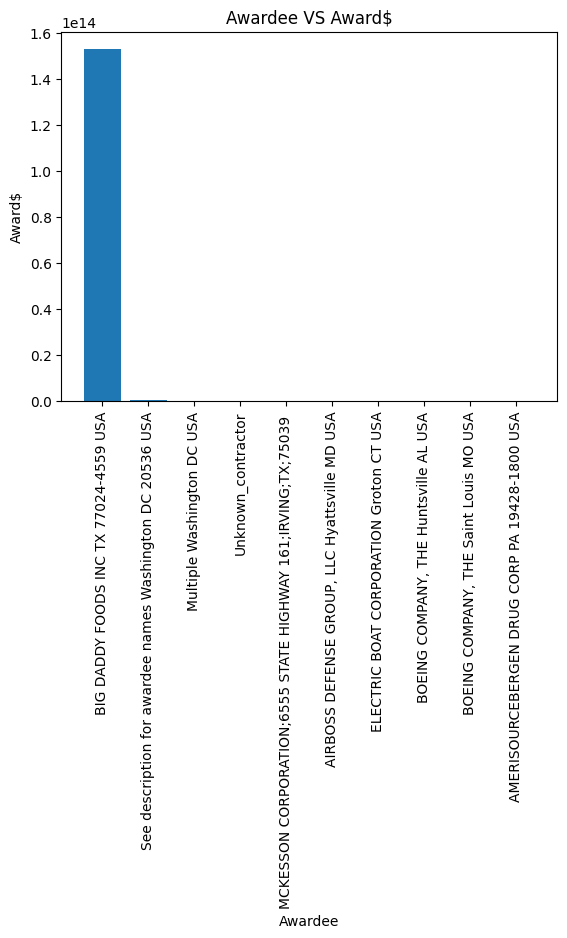

In [ ]:
#Here I am plotting a graph to know which awardee got highest sum of Award in dollars

Award_df = dfV2.groupby('Awardee')['Award$'].sum().reset_index()

# Rearranging the dataset in descending order based on the global sales
Award_df = Award_df.sort_values('Award$', ascending=False)
fig = plt.bar(Award_df['Awardee'][:10],Award_df['Award$'][:10])
plt.xticks(rotation='vertical')
plt.xlabel('Awardee')
plt.ylabel('Award$')
plt.title('Awardee VS Award$')

In [ ]:
Award_df

,Awardee,Award$
6903,BIG DADDY FOODS INC TX 77024-4559 USA,1.530622e+14
46562,See description for awardee names Washington D...,3.400000e+11
34056,Multiple Washington DC USA,2.510016e+11
51361,Unknown_contractor,2.422500e+11
31322,MCKESSON CORPORATION;6555 STATE HIGHWAY 161;IR...,6.180336e+10
...,...,...
25181,"IRVING BURTON ASSOCIATES, LLC FALLS CHURCH 22041",0.000000e+00
40876,REDCON SOLUTIONS GROUP LLC [UEI: HQXXAB4DV7H3],0.000000e+00
41601,ROBERT H BARRIOS SAN DIEGO 92110,-9.787300e+02
2992,AMERIPHYSICS LLC;9111 CROSS PARK DR STE D200;K...,-4.611100e+04


Big Daddy Foods INC has handled huge contracts in year between 2020 to 2022.

#### 2.2. Number of contracts for each states

In [ ]:
def generate_plots(df, column):
    
    state_counts = df[column].value_counts()
    top_5_values = state_counts.head(5)
    other_count = state_counts.sum() - top_5_values.sum()
    top_5_values['Others'] = other_count

    # Bar Chart
    plt.figure(figsize=(12,8))
    plt.subplot(1, 2, 1)
    plt.bar(top_5_values.index, top_5_values.values)
    plt.xticks(rotation='vertical')
    plt.xlabel(column)
    plt.ylabel('No. of contracts')
    plt.title('No. of contracts for each {}'.format(column))

    # ploting pie chart
    plt.subplot(1, 2, 2)
    plt.pie(top_5_values, labels=top_5_values.index, autopct='%1.1f%%')
    plt.legend(top_5_values.index, title=column, loc='lower left', bbox_to_anchor=(1, 0.5))
    plt.title('Distribution of {} in Top 5'.format(column))

    plt.tight_layout()

    plt.show()

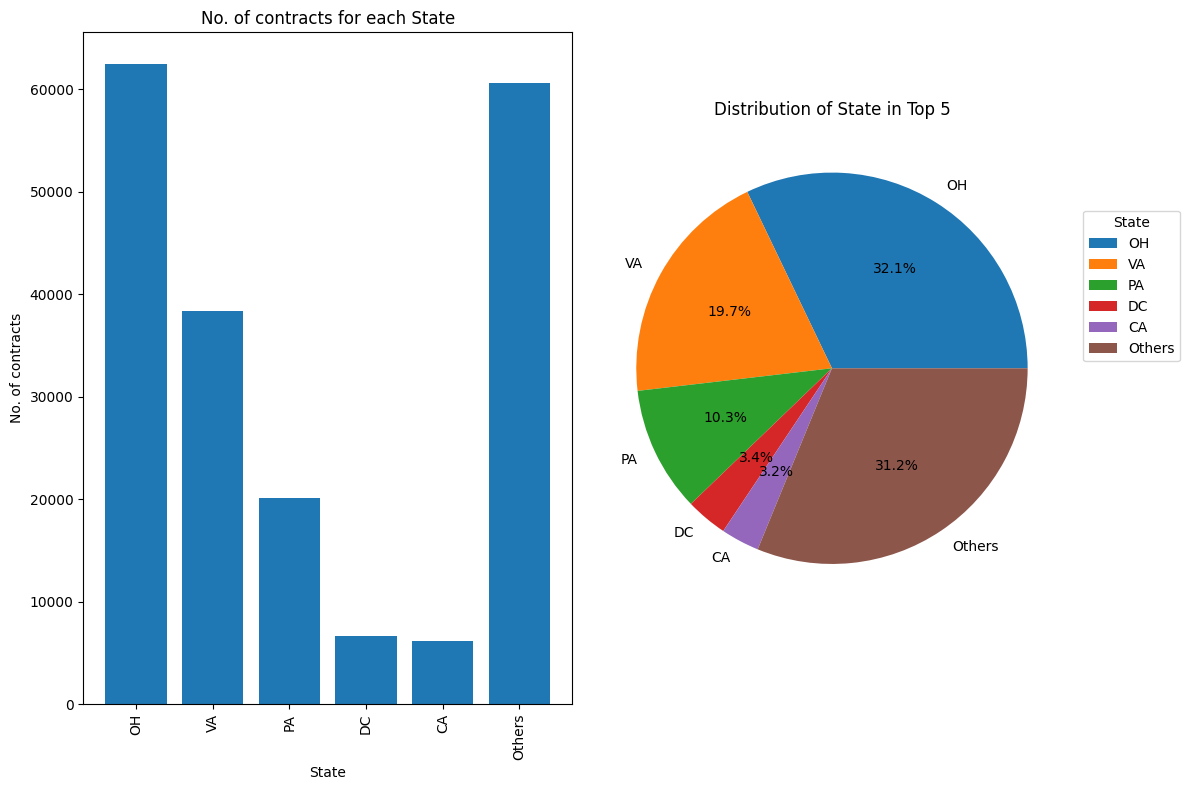

In [ ]:
generate_plots(dfV2,'State')

In [ ]:
Sorted_df = dfV2.sort_values('Award$', ascending=False)
Sorted_df.head()

,NoticeId,Title,Department/Ind.Agency,Sub-Tier,Office,PostedDate,ArchiveType,ArchiveDate,Active,AwardDate,Award$,Awardee,PrimaryContactFullname,OrganizationType,State,City,ZipCode,CountryCode
816801,a0abd647c3704fa185918666fd44e993,4th QTR FY22 Subsistence MDC Guaynabo,"JUSTICE, DEPARTMENT OF",FEDERAL PRISON SYSTEM / BUREAU OF PRISONS,MDC GUAYANBO,2022-07-15 08:30:28.992-04,auto15,2022-08-13,No,2022-07-29,1.530622e+14,BIG DADDY FOODS INC TX 77024-4559 USA,Rauniel Rivera,OFFICE,PR,"CATANO, CATANO",00962,USA
730418,c394c8792654416baa91d102029a5e2a,Scalable Ways to Implement Flexible Tasks (SWIFT),"HOMELAND SECURITY, DEPARTMENT OF",US IMMIGRATION AND CUSTOMS ENFORCEMENT,INFORMATION TECHNOLOGY DIVISION,2022-09-22 15:18:46.467-04,auto15,2022-09-30,No,2022-09-15,3.400000e+11,See description for awardee names Washington D...,Cristina Williams,OFFICE,DC,WASHINGTON,20024,USA
320129,2664ce154e984670a65509a43dffd597,65--Pharmaceutical Prime Vendor 2020,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",NAC PRIME VENDOR (36W797),2019-12-12 10:19:48.492-05,autocustom,2020-02-09,No,2019-12-11,6.180316e+10,MCKESSON CORPORATION;6555 STATE HIGHWAY 161;IR...,Karen E. Ade Senior Contract Specialist 708-78...,OFFICE,IL,HINES,60141,USA
581827,a3a0bb7863344ad0ba279cbee7feacc8,nitrile gloves,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",OFFICE OF ASSISTANT SECRETARY FOR PREPAREDNESS...,OFC ASST SEC FOR PREPARENESS RES,2021-03-18 17:43:17.831-04,auto15,2021-04-02,No,2021-03-18,5.762120e+10,"AIRBOSS DEFENSE GROUP, LLC Hyattsville MD USA",Annette Wright,OFFICE,DC,WASHINGTON,20201,USA
490001,5a193ac7578244f9b9b3e747c6419c25,8(a) STARS III Governmentwide Acquisition Cont...,GENERAL SERVICES ADMINISTRATION,FEDERAL ACQUISITION SERVICE,"GSA/FAS ITC OFFICE OF ACQUISITION OPERATIONS, ...",2021-06-17 16:07:50.596-04,auto15,2021-07-02,No,2021-06-17,5.000000e+10,Multiple Washington DC USA,Mr. Jean Fluevog,OFFICE,DC,WASHINGTON,20405,USA


### 3. Hypothesis

#### 3.1. Based on the year from 2020 to 2022, contracts which are properly documented and archived are decreased due to covid effects.



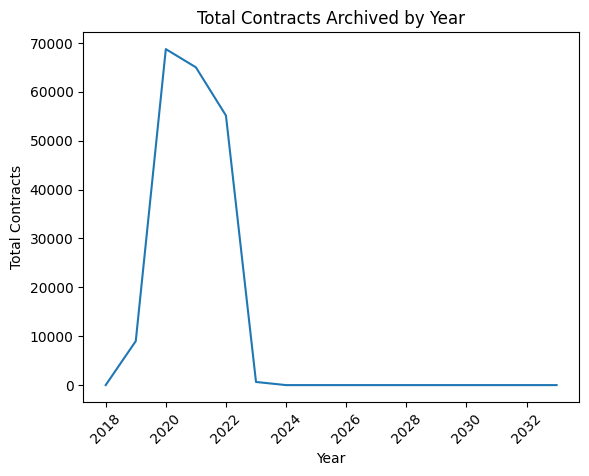

In [ ]:
dfV2['ArchiveDate'] = pd.to_datetime(dfV2['ArchiveDate'])
contracts_by_year = dfV2.groupby(dfV2['ArchiveDate'].dt.year)['NoticeId'].count()

# Line plot of total contracts based on year
plt.plot(contracts_by_year.index, contracts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Contracts')
plt.title('Total Contracts Archived by Year')
plt.xticks(rotation=45)
plt.show()

As shown in the graph above, the overall number of contracts is falling each year between 2020 and 2022 as a result of how the corona breakout has affected the contracts.

#### 3.2. Department of defence and agricultural contracts are arhchived more compared to other departments.

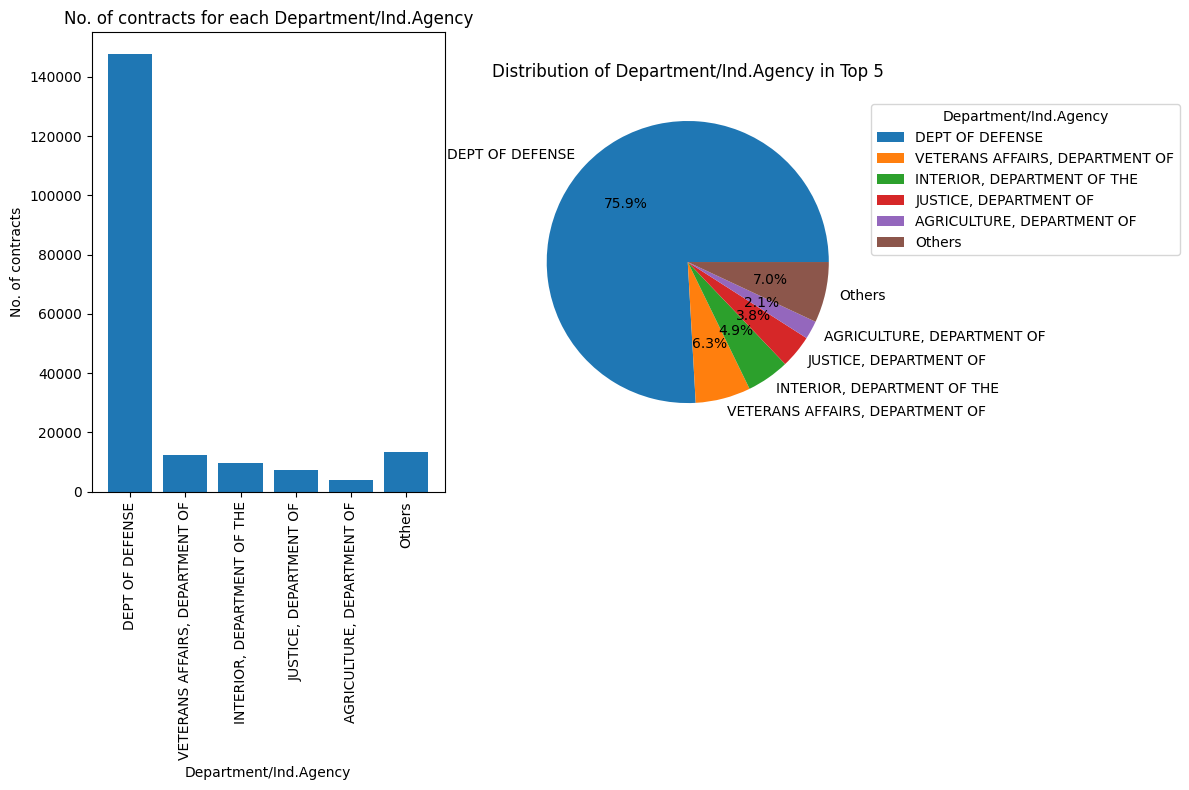

In [ ]:
generate_plots(dfV2,'Department/Ind.Agency')

As per the above graphs, some part of hypothesis is true because Department of defense has highest number of contracts and Agriculture contracts are less.

In [ ]:
end_time = time.time()

# Calculate the execution time in seconds
execution_time = end_time - start_time

# Print the execution time
print("Execution time: {:.2f} seconds".format(execution_time))

Execution time: 228.75 seconds
